In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' ## 한글 폰트 설정

In [2]:
data = sns.load_dataset('titanic')

In [3]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


회귀선이 있는 산점도


regplot() => 서로 다른 2개의 연속 변수 사이의 산접도를 그리고 선형회귀분석에 의한 회귀선을 함께 나타냄

<AxesSubplot:xlabel='age', ylabel='fare'>

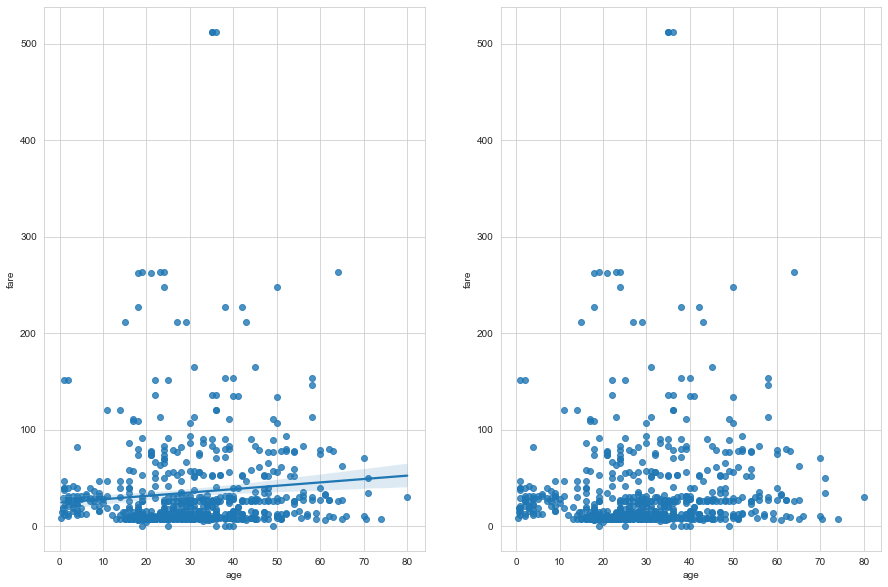

In [4]:


sns.set_style('whitegrid') ## 테마 종류 darkgrid,dark,white,ticks

## 그래프 2개
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,2,1)  ## (행갯수,열갯수,순서)
ax2 = fig.add_subplot(1,2,2)

## 선형 회귀 표시
sns.regplot(x='age',y='fare',
            data=data, ## 데이터
            ax=ax1 ## 첫번째 그래프 
           ## 기본값 fit_reg=True => 선형회귀 표시
           )
sns.regplot(x='age',y='fare',
           data=data,
           ax=ax2,
           fit_reg=False)


displot()=> 하나의 변수 데이터의 분포를 확인할 때 사용

* 기본값으로 히스토그램과 커널 밀도 함수 출력

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

<AxesSubplot:xlabel='fare'>

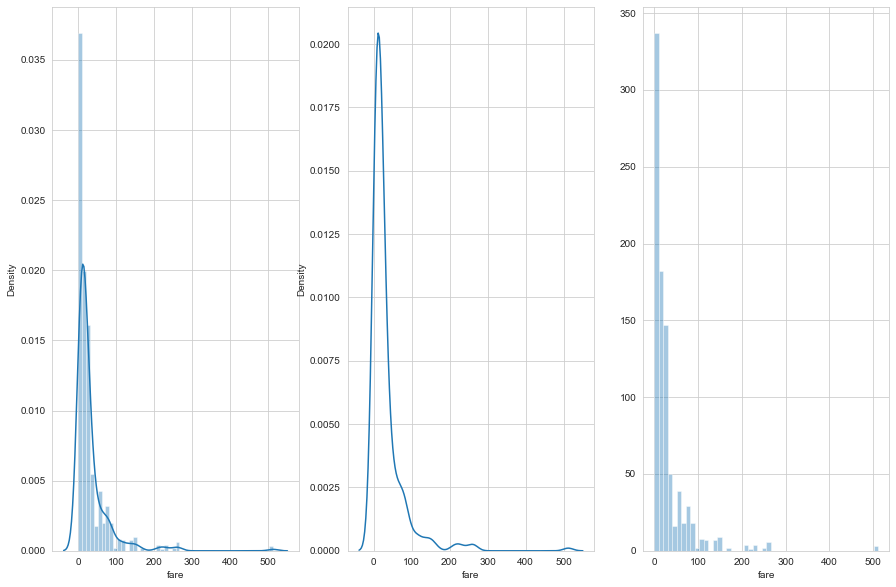

In [5]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,3,1)  ## (행갯수,열갯수,순서)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
sns.distplot(data['fare'],ax=ax1)
sns.distplot(data['fare'], kde=True, hist=False, ax=ax2) ## 밀도함수만 출력
sns.distplot(data['fare'],kde=False, hist=True, ax=ax3) ## 히스토그램만 출력

히트맵

* 2개의 범주형 자료를 X,Y축에 놓고 그값에 비례하여 색깔을 다르게 해서 2차원 그래프로 나타냄

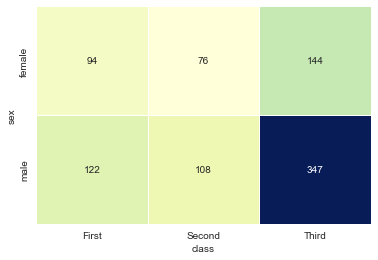

In [6]:
table = data.pivot_table(index=['sex'],columns=['class'],aggfunc='size') ## aggfunc 데이터 값을 크기 기준으로 집계
sns.heatmap(table,
           annot=True,fmt='d', ## 데이터 값 표시 여부, 정수형 포멧
           cmap='YlGnBu', ## 컬러맵
           linewidth = .5, ## 구분선
           cbar = False) ## 컬러바 표시여부
plt.show()

범주형 데이터 산점도

* 데이터 분포를 확인 하는 방법으로 stripplot(),swarmplot()을 사용

* swarmplot()은 데이터의 분산까지 고려하여 데이터 포인터가 서로 중복되지 않게 그림

Text(0.5, 1.0, 'swarmplot')

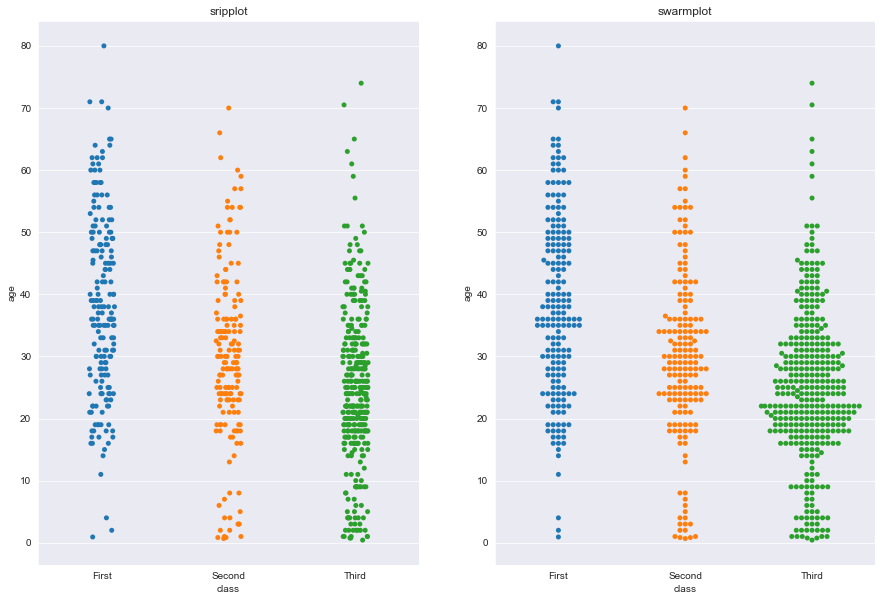

In [7]:
## 테마설정
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,2,1)  ## (행갯수,열갯수,순서)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(x='class',
             y='age',
             data = data,
             ax=ax1)
sns.swarmplot(x='class',
             y='age',
             data = data,
             ax=ax2)
ax1.set_title('sripplot')
ax2.set_title('swarmplot')

막대그래프 => barplot

* 그래프 위 검은막대는 신뢰구간을 표시

* 신뢰구간 = 모수가 실제로 포함될 것으로 예측 되는 범위  # 모수 - 표본의 대푯값을 통해 주정하는 모집단의 대푯값

<AxesSubplot:xlabel='sex', ylabel='survived'>

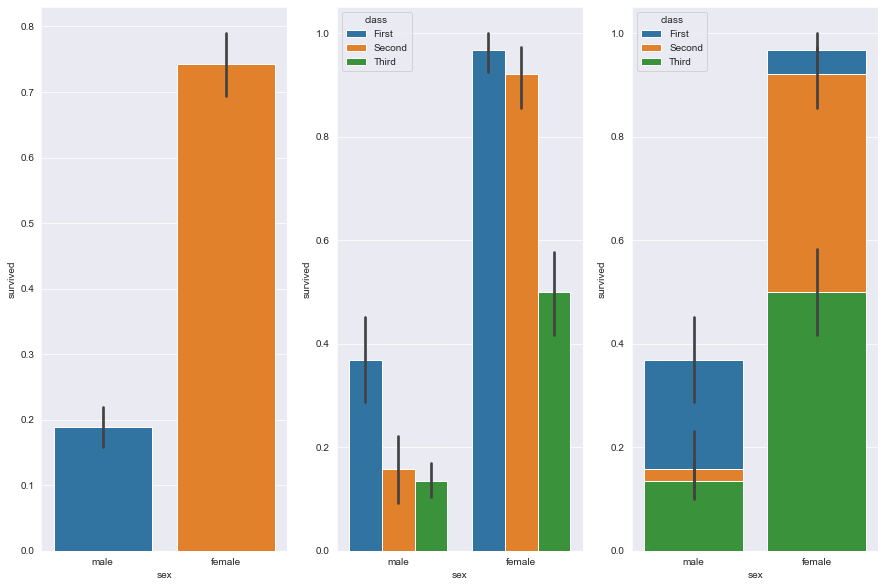

In [8]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,3,1)  ## (행갯수,열갯수,순서)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex',y='survived',data=data,ax=ax1)
sns.barplot(x='sex',y='survived',hue='class',data=data,ax=ax2)   
sns.barplot(x='sex',y='survived',hue='class',dodge=False,data=data,ax=ax3)

빈도 그래프

* 데이터의 개수를 막대 그래프로 나타내는 countplot()

* hue 옵션 = 축방향으로 hue변수를 분리하지 않고 위로 쌓아 올린 누적 막대 그래프 출력

Text(0.5, 1.0, 'hue=who,dodge=False')

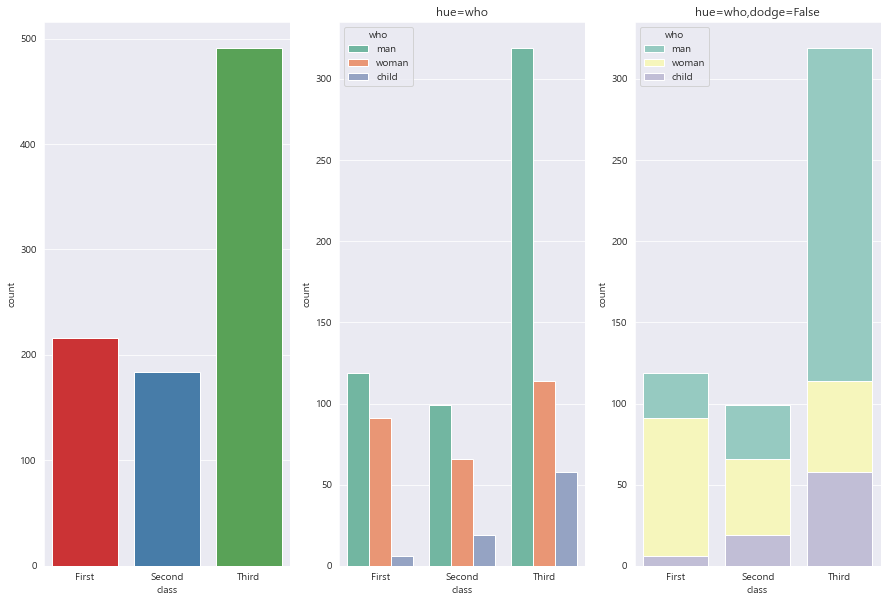

In [37]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1,3,1)  ## (행갯수,열갯수,순서)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x='class',palette='Set1',data = data ,ax=ax1) # palette => 색상 옵션

#hue 추가
sns.countplot(x='class',hue='who',palette='Set2',data=data,ax=ax2)

#dodge = False => 분리하지않고 누적 그래프 출력
sns.countplot(x='class',hue='who',palette='Set3',dodge=False,data=data,ax=ax3)

ax2.set_title('hue=who')
ax3.set_title('hue=who,dodge=False')

박스 플랏(boxplot), 바이올린 그래프(viloinplot)

* 박스 플롯은 데이터 분포와 주요 통계지표를 함께 제공, 하지만 데이터가 퍼져 있는 분산의 정도를 파악하기 힘듦,

  꼬리 밖에 있는 점들은 이상치로 판단



* 이때문에 y축 방향으로 커널밀도 함수 그래프를 추가하는 바이올린 그래프를 그리는 경우도 있음


<AxesSubplot:xlabel='alive', ylabel='age'>

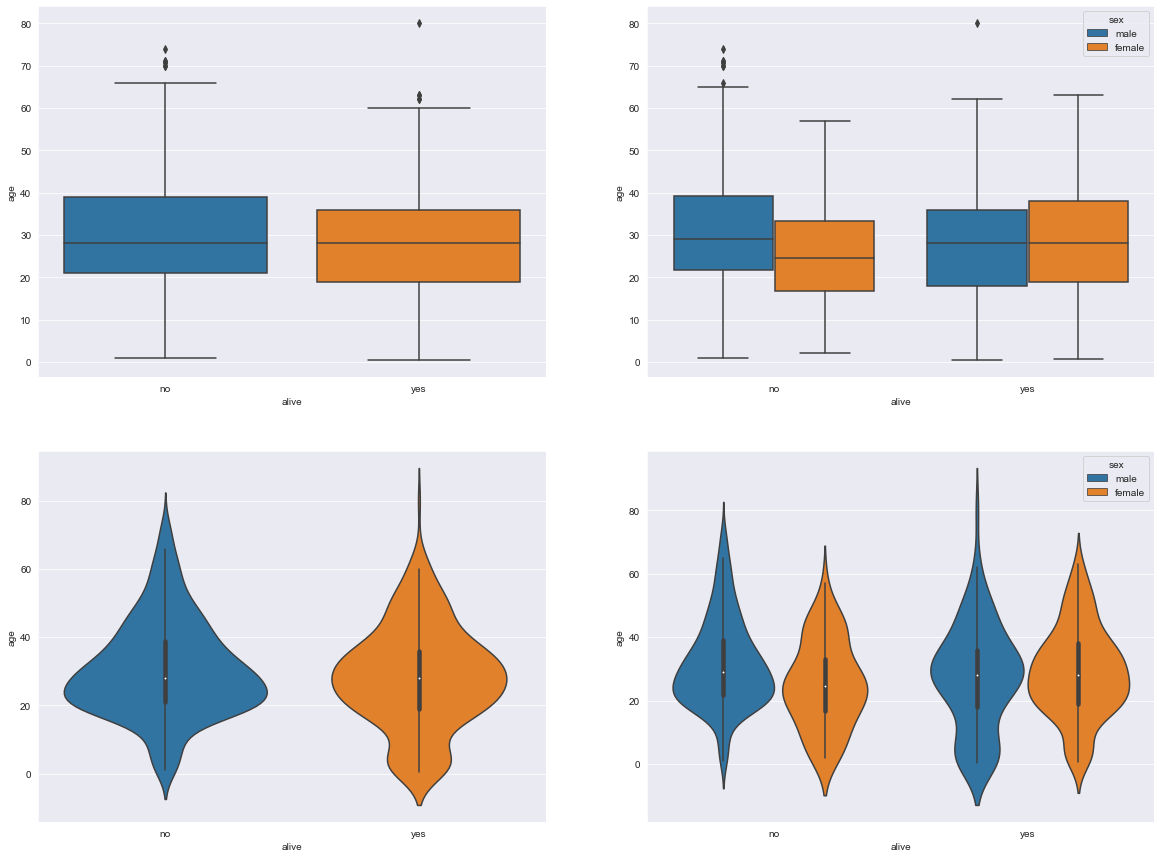

In [28]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(2,2,1)  ## (행갯수,열갯수,순서)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 박스 플롯
sns.boxplot(x='alive',y='age',data=data,ax=ax1)

# hue 변수 추가
sns.boxplot(x='alive',y='age',hue='sex',data=data,ax=ax2)

# 바이올린 그래프
sns.violinplot(x='alive',y='age',data=data,ax=ax3)
# 바이올린 그래프 hue 변수 추가
sns.violinplot(x='alive',y='age',hue='sex',data=data,ax=ax4)

조인트 그래프(jointplot())

* 산점도를 기본으로 표시하고 x-y축에 각 변수에 대한 히스토그램을 동시에 보여줌
  
  두 변수의 관계와 분산되어있는 정도를 한눈에 파악하기 좋음
 

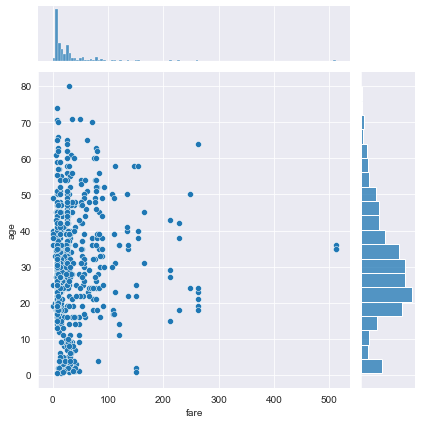

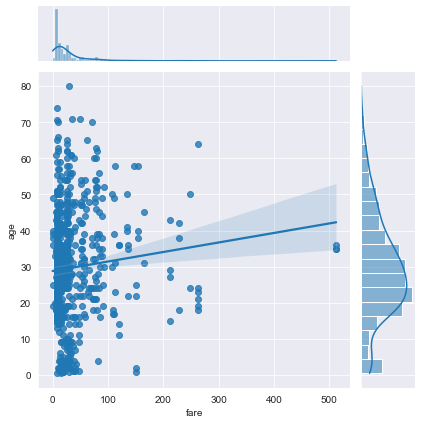

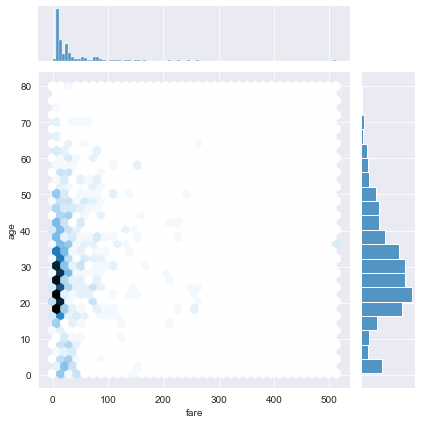

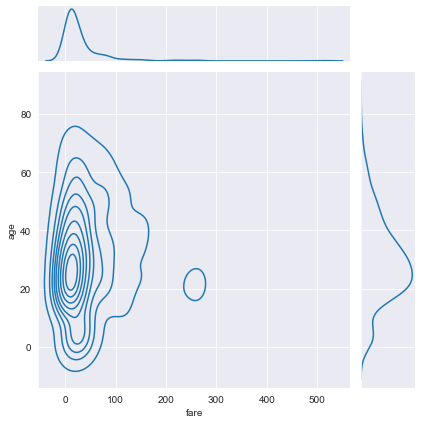

In [48]:
sns.set_style('darkgrid')


# 산점도(기본값)
sns.jointplot(x='fare',y='age',data=data)

# 회귀선
sns.jointplot(x='fare', y='age' ,kind='reg',data=data)  # kind = 'reg' => 회귀선 추가

#육각 그래프 (육각 산점도)
sns.jointplot(x='fare', y='age' ,kind='hex',data=data)

# 커널 밀집 그래프
sns.jointplot(x='fare', y='age' ,kind='kde',data=data)


FacetGrid() => 행,열 방향으로 서로 다른 조건을 적용하여 여러개의 서브 플롯을 만든다

map()을 이용하여 적용할 그래프 종류에 그리드 객체 전달



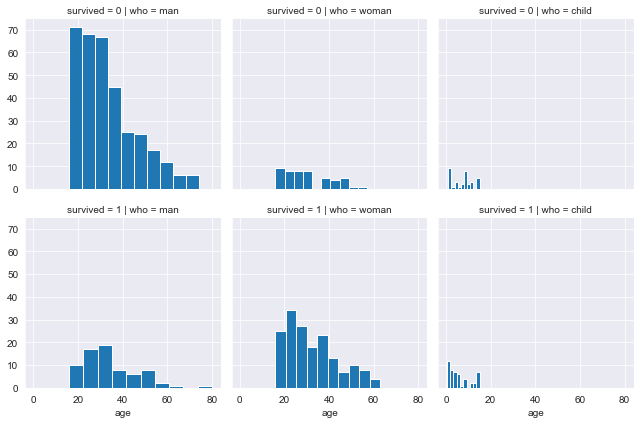

In [49]:
sns.set_style('darkgrid')
grid_ = sns.FacetGrid(data=data,col='who',row = 'survived')
grid_ = grid_.map(plt.hist,'age')

위 그래프로 보았을 때 남성보다는 여성의 생존자가, 나이는 20~40대 사이의 생존자가 많은 것으로 나타남

pairplot() => 두변수간의 그래프를 나타내는 그래프를 하나씩 그리고 같은 변수끼리 짝을 이루는 대각선 방향으로는 히스토그램을 그리고 서로 다른 변수 간에는 산점도를 그린다

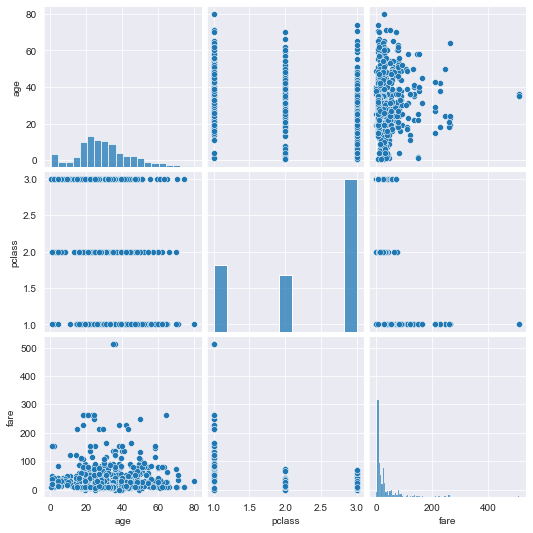

In [51]:
pair_ = data[['age','pclass','fare']]
pairplot_ = sns.pairplot(pair_)